In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/242 stuff/'

/content/drive/.shortcut-targets-by-id/1nZdBXcgOjpxd5SkB9aMUeFt3GkW5DgM0/242 stuff


# New Section

In [3]:
cd syn-rep-learn-main/

/content/drive/.shortcut-targets-by-id/1nZdBXcgOjpxd5SkB9aMUeFt3GkW5DgM0/242 stuff/syn-rep-learn-main


In [ ]:
!conda env remove --name synrep
!conda env create -f environment_overcomplete.yml

In [ ]:
!pip install timm==0.5.4 \
             tensorboard \
             packaging \
             pip install inf

In [ ]:
# Managing Data
import shutil
import torch
import os
import numpy as np
from torchvision.datasets import ImageFolder

# Load the full dataset without applying any transforms
full_dataset = ImageFolder(root='./processed_data/', transform=None)

# Create train and val directories
os.makedirs('./processed_data/train/', exist_ok=True)
os.makedirs('./processed_data/val/', exist_ok=True)

# Get indices for train and val splits
train_size = int(len(full_dataset))  # 80% of the dataset
indices = torch.randperm(len(full_dataset)).tolist()
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Function to copy images to new directory structure
def copy_images(dataset, indices, dest_folder):
    for idx in indices:
        # Get image path and label
        img_path, label = dataset.samples[idx]
        # Determine the class name based on the label
        class_name = dataset.classes[label]
        # Create a directory for the class if it doesn't exist already
        os.makedirs(os.path.join(dest_folder, class_name), exist_ok=True)
        # Copy the image to the new directory structure
        dest_path = os.path.join(dest_folder, class_name, os.path.basename(img_path))
        shutil.copy(img_path, dest_path)

# Copy the images based on the split
copy_images(full_dataset, val_indices, './processed_data/val/')
copy_images(full_dataset, train_indices, './processed_data/train/')

In [ ]:
# Changing data structure
import os
import shutil

# Set the directory where your dataset is stored
dataset_dir = 'images/'  # Replace with your dataset directory
output_dir = 'imagesupdate/'  # Replace with desired output directory

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Loop through all files in the dataset directory
for filename in os.listdir(dataset_dir):
    if filename.endswith('.jpg') or filename.endswith('.mat'):  # Assuming all images are in .jpg format
        # Extract class name from the file name
        class_name = filename.split('_')[0]  # This depends on your file naming convention

        # Create a directory for the class if it doesn't exist
        class_dir = os.path.join(output_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

        # Move the file to the class directory
        shutil.move(os.path.join(dataset_dir, filename), os.path.join(class_dir, filename))

print("Dataset sorting complete.")

Dataset sorting complete.


In [ ]:
!python main_linear.py --model base --data "/content/drive/My Drive/242 stuff/syn-rep-learn-main/" --pretrained laion_stablerep_pp_50m.pth --gpu 0 --num-classes 10 --eval-freq 5 --val-split 0.1 --data-use-percent 0.10
  # --output-dir /path/to/linear_save \
  # --log-dir /path/to/tensorboard_folder

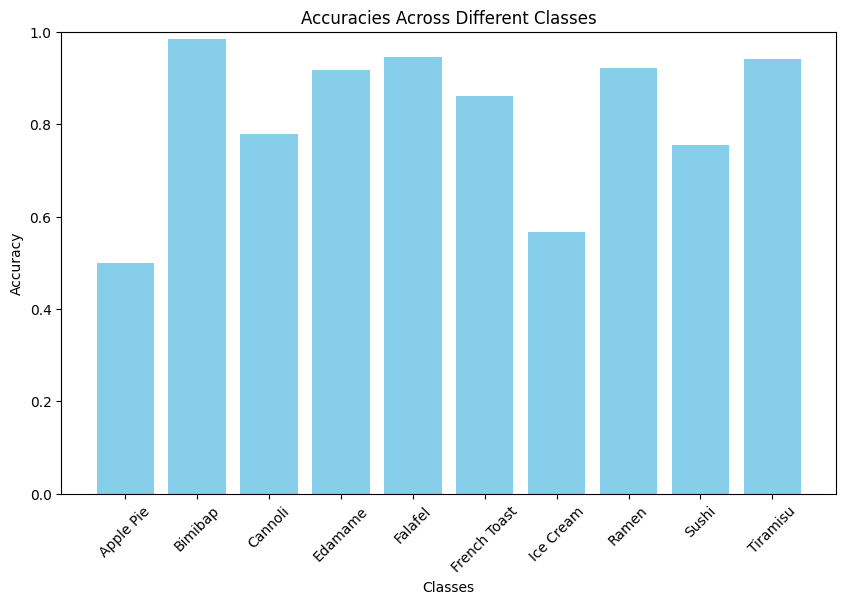

In [2]:
import matplotlib.pyplot as plt

# Class names
classes = ["Apple Pie", "Bimibap", "Cannoli", "Edamame", "Falafel",
           "French Toast", "Ice Cream", "Ramen", "Sushi", "Tiramisu"]

# Accuracies for each class
accuracies = [0.5, 0.9840, 0.7780, 0.9180, 0.9460,
              0.8620, 0.5660, 0.9220,0.7540,0.9400]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(classes, accuracies, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Accuracy')
plt.title('Accuracies Across Different Classes')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Setting the limit for y-axis to 1 as accuracy cannot exceed 1
plt.show()
